In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
# from functions import *

In [99]:
df = pd.read_csv('brief_assurance.csv')

In [100]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [102]:
reg_multi = smf.ols('charges~age + sex + bmi + children + smoker + region', data=df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 13 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:19:32   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

In [103]:
influence = reg_multi.get_influence().summary_frame()

In [104]:
influence

,dfb_Intercept,dfb_sex[T.male],dfb_smoker[T.yes],dfb_region[T.northwest],dfb_region[T.southeast],dfb_region[T.southwest],dfb_age,dfb_bmi,dfb_children,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.036723,0.044416,-0.080228,-0.002648,0.000936,-0.058421,0.051964,0.007810,0.033941,0.002036,-1.393636,0.009347,-0.135368,-1.394131,-0.135416
1,-0.003458,-0.007595,0.005672,0.000124,-0.009594,0.000207,0.011710,-0.001507,-0.000073,0.000050,-0.285015,0.005482,-0.021161,-0.284917,-0.021154
2,-0.000937,-0.009914,0.007474,0.000639,-0.013231,0.000556,0.008540,0.000462,-0.016843,0.000098,-0.373573,0.006271,-0.029676,-0.373452,-0.029667
3,0.087610,0.091650,-0.044585,0.120596,0.023550,0.009081,-0.021488,-0.092129,-0.077520,0.005871,3.015871,0.005776,0.229873,3.025106,0.230577
4,-0.001963,-0.008234,0.004090,-0.011354,-0.000110,-0.000153,0.003559,0.000287,0.007391,0.000045,-0.285360,0.004901,-0.020025,-0.285261,-0.020018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.006304,-0.008146,0.004094,-0.010981,0.000184,0.000538,-0.005501,-0.001120,-0.011846,0.000058,-0.289703,0.006176,-0.022838,-0.289603,-0.022830
1334,-0.006964,0.006030,0.002704,0.008501,0.009418,0.008742,0.009381,-0.004167,0.004687,0.000034,-0.216143,0.006601,-0.017619,-0.216066,-0.017612
1335,-0.004430,0.011971,0.006392,0.000002,-0.012413,0.000643,0.018032,-0.009480,0.009083,0.000126,-0.416937,0.006488,-0.033694,-0.416807,-0.033683
1336,0.004921,-0.003288,-0.001382,0.000032,0.000592,0.005177,-0.004227,-0.002142,-0.002978,0.000011,0.125980,0.006135,0.009898,0.125934,0.009894


In [105]:
n = df.shape[0]
p = 4
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

In [106]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 5/(n-p)

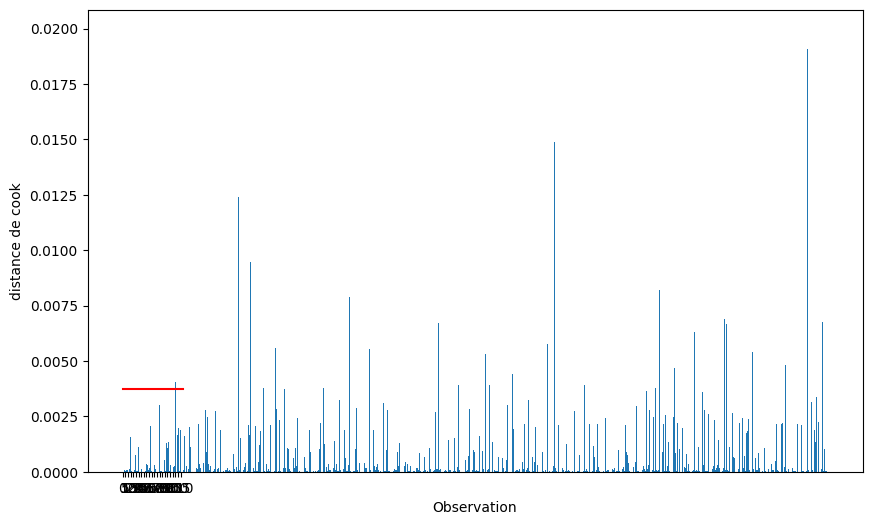

In [107]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 115, step=5))
plt.xlabel('Observation')
plt.ylabel('distance de cook')
plt.plot([0, 115], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [108]:
cook_residual_index =influence[influence['cooks_d']>seuil_dcook].index
cook_residual_index.size


59

In [109]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0089001621005724,
 1.0120736649061481,
 1.5188230422658702,
 1.6522297050744421,
 1.5294111558740762,
 1.0168221490038103,
 1.106629732428616,
 1.004010642137024]